In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls=pd.read_csv(r"C:\Users\HP\Downloads\6 - Naive Bayes Loan Status Classification\ML Project - Naive Bayes Loan Status Classification U16955482770.csv")

In [3]:
ls

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,NaN,1837.0,3526.0,8998.0,129.0,NaN,NaN,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,NaN,NaN,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [4]:
ls.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [5]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


In [6]:
ls.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,27992.000000,27494.000000,27130.000000,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.504160,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,61569.150299,60904.557498,58654.145088,54827.113904,51729.302253,51625.821980,12548.633278,1.849890e+04,12242.048527,11056.957868,11071.445005,13358.162766
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.000000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1574.000000,1556.000000,1534.000000,1433.000000,1327.000000,1261.000000,15.000000,1.400000e+01,8.000000,6.000000,5.000000,5.000000
50%,7483.500000,9.000000,33.000000,8551.500000,8697.500000,8889.500000,8671.000000,8131.500000,7819.000000,166.000000,1.640000e+02,119.000000,75.000000,75.000000,78.000000
75%,18746.250000,21.000000,41.000000,38251.750000,38605.500000,36534.250000,32855.000000,29680.500000,29459.750000,1667.000000,1.662000e+03,1381.250000,983.000000,982.000000,1133.000000
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [7]:
ls.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [8]:
(ls.isnull().mean())*100

ID                 0.000000
LIMIT_BAL          0.000000
AGE                0.000000
BILL_AMT1          6.693333
BILL_AMT2          8.353333
BILL_AMT3          9.566667
BILL_AMT4         10.650000
BILL_AMT5         11.686667
BILL_AMT6         13.400000
PAY_AMT1          17.496667
PAY_AMT2          17.986667
PAY_AMT3          19.893333
PAY_AMT4          21.360000
PAY_AMT5          22.343333
PAY_AMT6          23.910000
Default Status     0.000000
dtype: float64

In [9]:
ls.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [10]:
def random_chose(ts, column):
    non_missing_value = ts[column].dropna()
    t=ts[column] = ts[column].apply(
        lambda x: np.random.choice(non_missing_value) if pd.isnull(x) else x
    )

In [11]:
random_chose(ls,"BILL_AMT1")
random_chose(ls,"BILL_AMT2")
random_chose(ls,"BILL_AMT3")
random_chose(ls,"BILL_AMT4")
random_chose(ls,"BILL_AMT5")
random_chose(ls,"BILL_AMT6")

In [12]:
random_chose(ls,"PAY_AMT1")
random_chose(ls,"PAY_AMT2")
random_chose(ls,"PAY_AMT3")
random_chose(ls,"PAY_AMT4")
random_chose(ls,"PAY_AMT5")
random_chose(ls,"PAY_AMT6")

In [13]:
ls.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,29137.0,25292.0,-41.0,416.0,689.0,9851.0,1.0,35.0,145.0,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,48.0,1.0,1.0,1.0,34865.0,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [14]:
ls.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

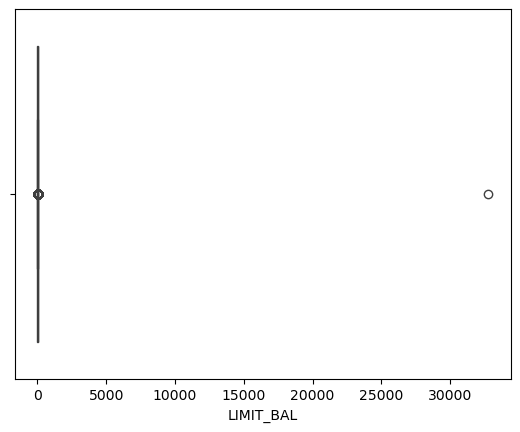

In [15]:
sns.boxplot(x=ls["LIMIT_BAL"])
plt.show()

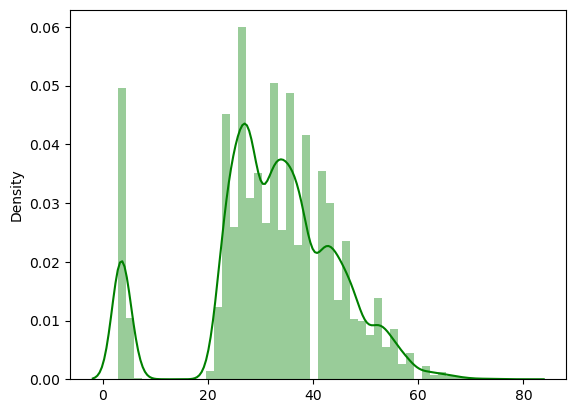

In [16]:
sns.distplot(x=ls["AGE"],color="g")
plt.show()

In [17]:
ls.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,29137.0,25292.0,-41.0,416.0,689.0,9851.0,1.0,35.0,145.0,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,48.0,1.0,1.0,1.0,34865.0,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [18]:
av_amt_bill=ls[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean()
min_amt_bill=ls[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].min()
max_amt_bill=ls[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].max()

In [19]:
av_amt_pay=ls[['PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean()
min_amt_pay=ls[['PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].min()
max_amt_pay=ls[['PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].max()

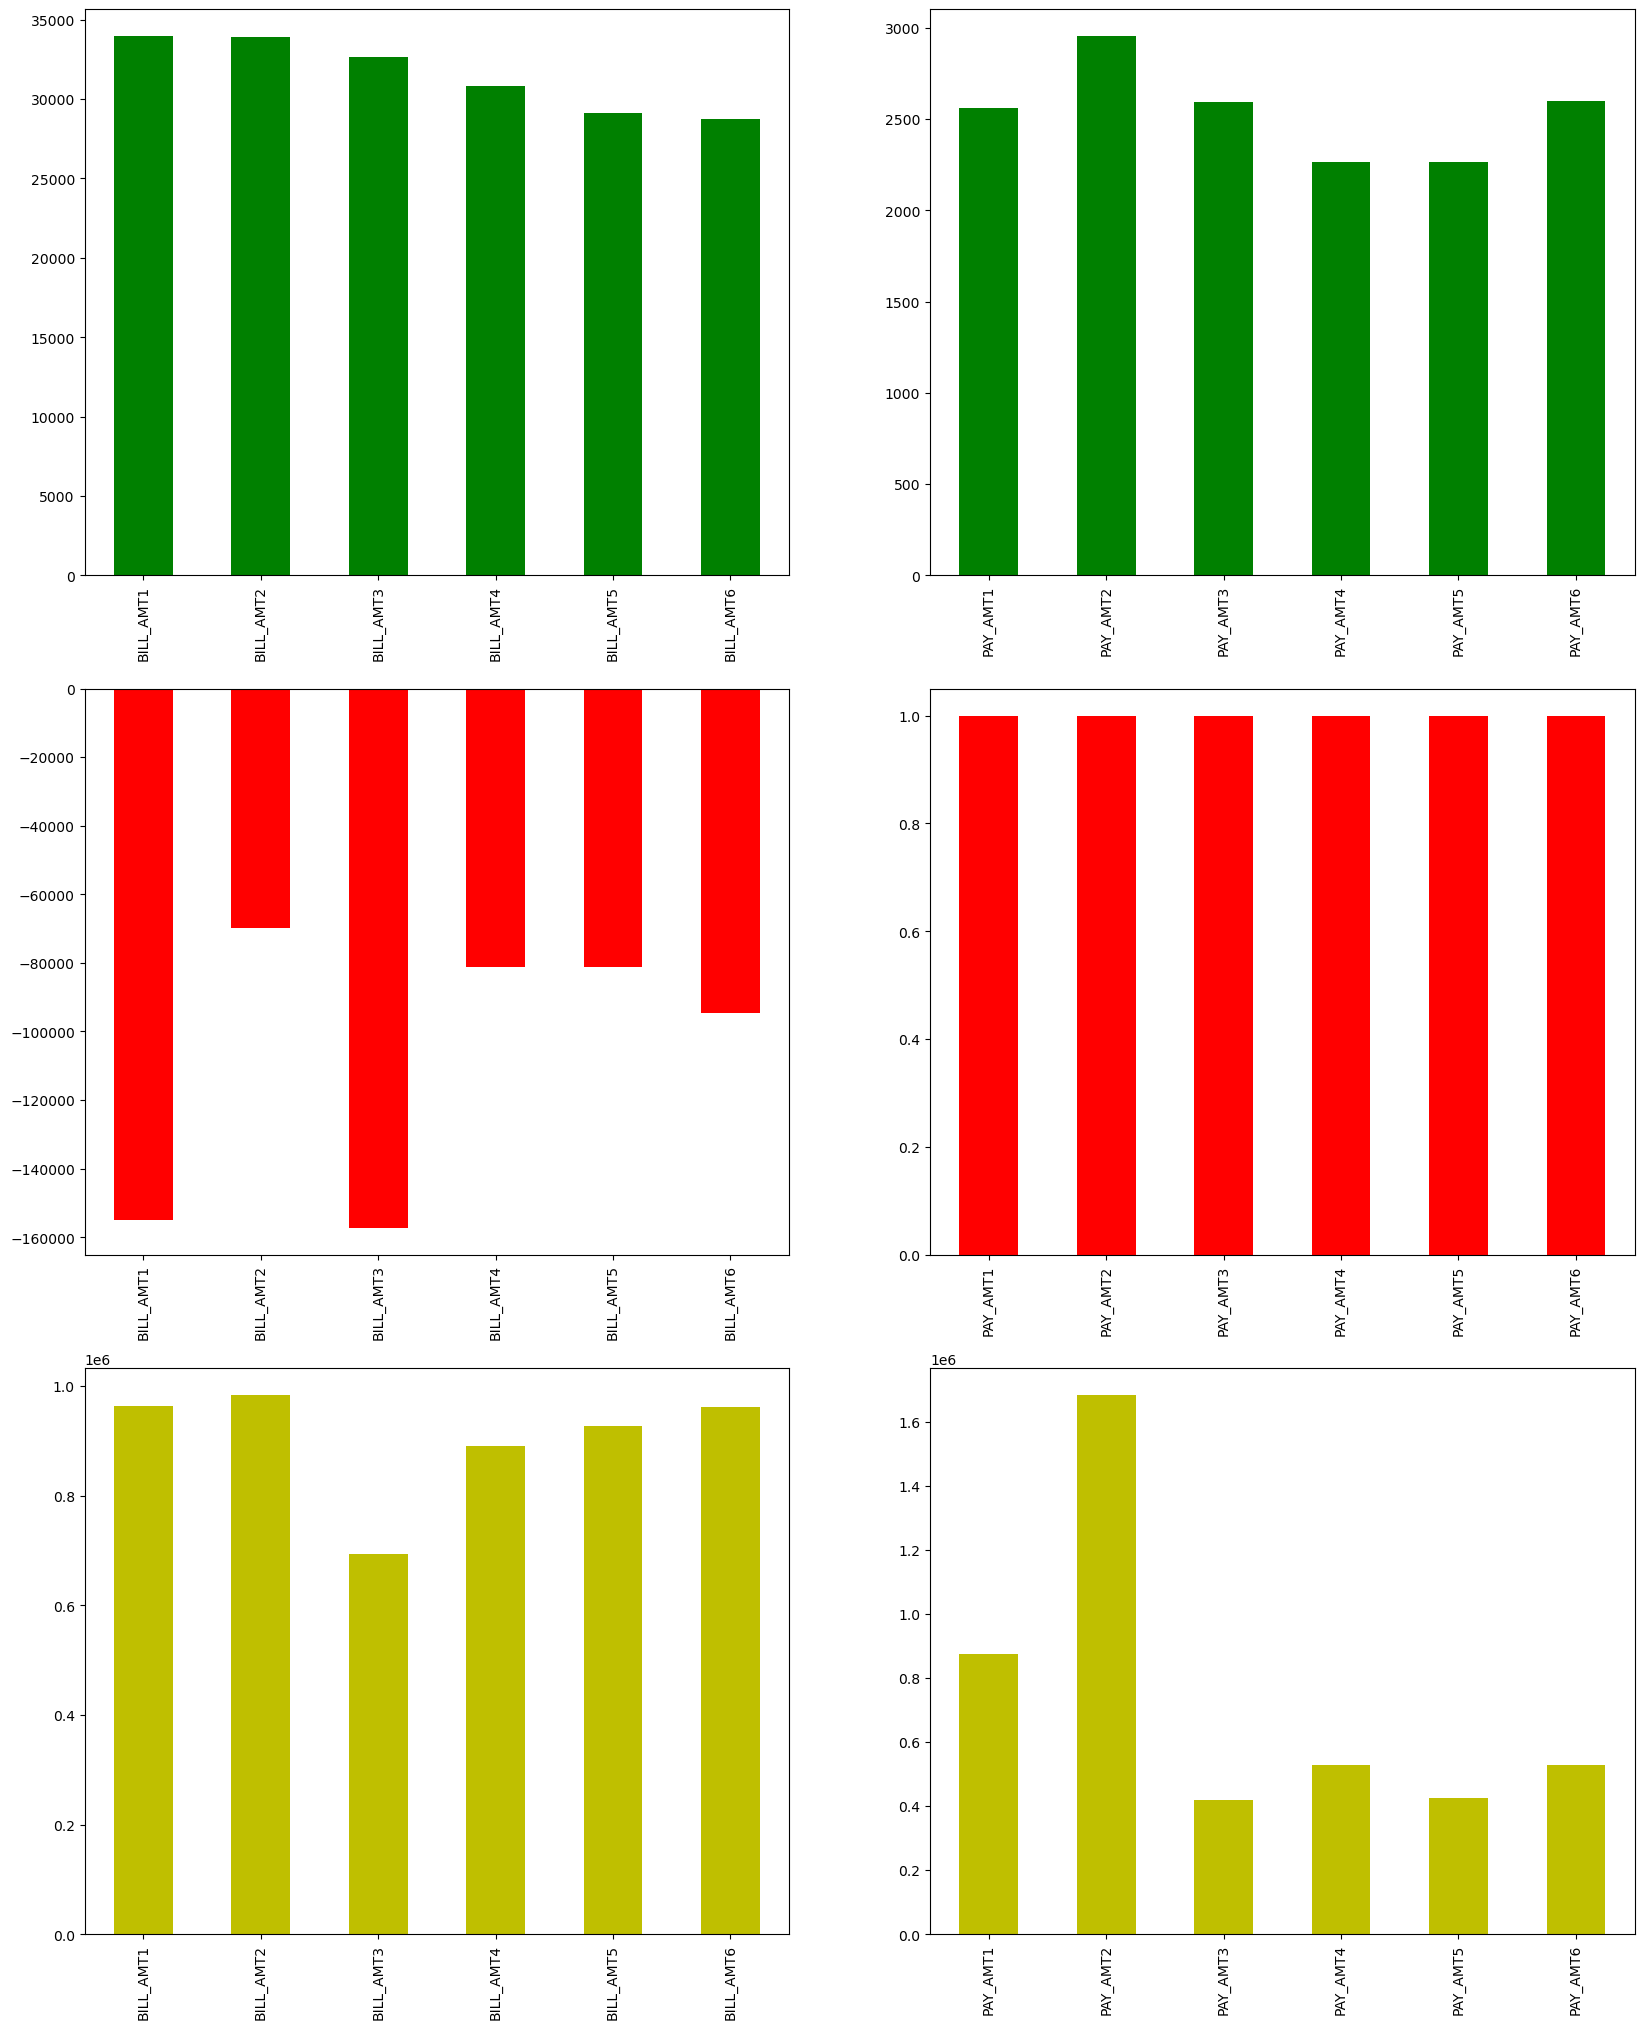

In [20]:
plt.figure(figsize=[20,25])

plt.subplot(3,2,1)
av_amt_bill.plot(kind="bar",color="g")
plt.subplot(3,2,2)
av_amt_pay.plot(kind="bar",color="g")

plt.subplot(3,2,3)
min_amt_bill.plot(kind="bar",color="r")
plt.subplot(3,2,4)
min_amt_pay.plot(kind="bar",color="r")

plt.subplot(3,2,5)
max_amt_bill.plot(kind="bar",color="y")
plt.subplot(3,2,6)
max_amt_pay.plot(kind="bar",color="y")
plt.show()

In [21]:
ls

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,29137.0,25292.0,-41.0,416.0,689.0,9851.0,1.0,35.0,145.0,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,48.0,1.0,1.0,1.0,34865.0,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,11946.0,1837.0,3526.0,8998.0,129.0,525.0,43.0,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,3965.0,12.0,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [22]:
amt_pay=ls[['PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum()

In [23]:
amt_pay

PAY_AMT1    76853220.0
PAY_AMT2    88638933.0
PAY_AMT3    77843658.0
PAY_AMT4    68008012.0
PAY_AMT5    67971539.0
PAY_AMT6    77924807.0
dtype: float64

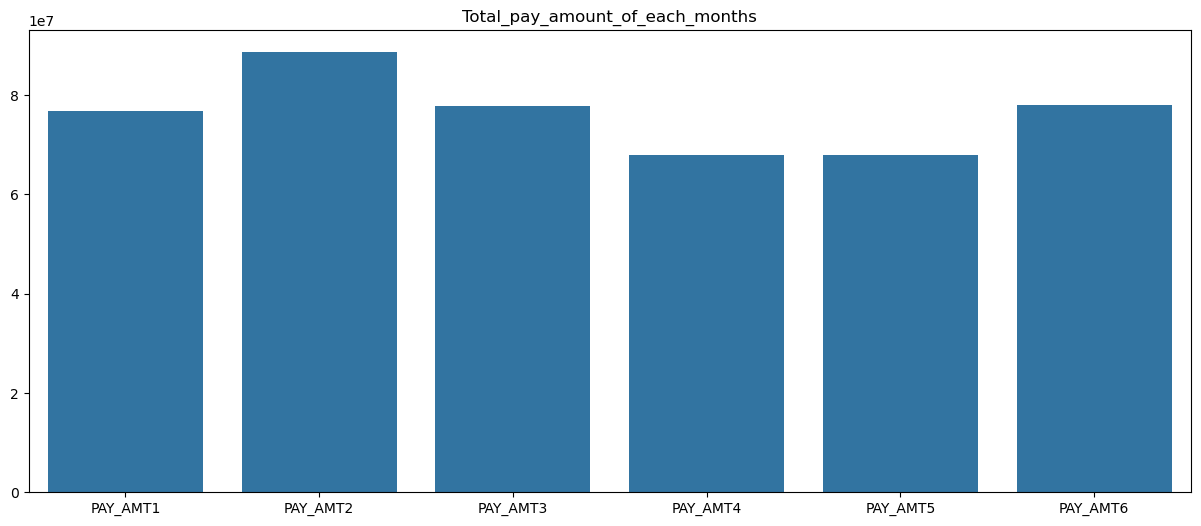

In [24]:
#Total_pay_amount_of_each_months
plt.figure(figsize=[15,6])
sns.barplot(amt_pay)
plt.title("Total_pay_amount_of_each_months")
plt.show()

In [25]:
amt_bill=ls[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].max()

In [26]:

amt_bill

BILL_AMT1    964511.0
BILL_AMT2    983931.0
BILL_AMT3    693131.0
BILL_AMT4    891586.0
BILL_AMT5    927171.0
BILL_AMT6    961664.0
dtype: float64

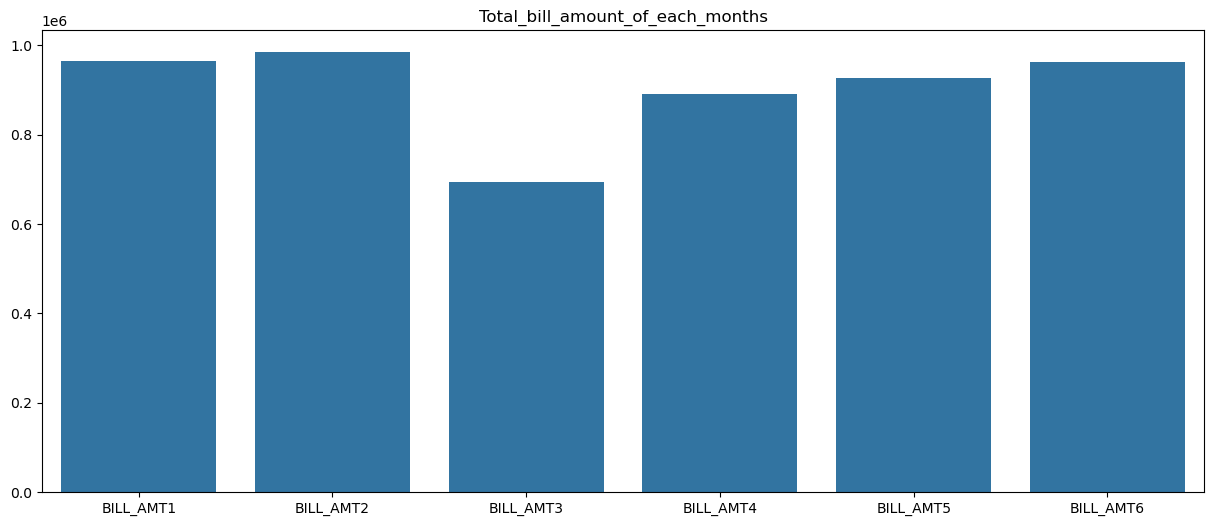

In [27]:
#Total_bill_amount_of_each_months
plt.figure(figsize=[15,6])
sns.barplot(amt_bill)
plt.title("Total_bill_amount_of_each_months")
plt.show()

In [28]:
ls

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,29137.0,25292.0,-41.0,416.0,689.0,9851.0,1.0,35.0,145.0,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,48.0,1.0,1.0,1.0,34865.0,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,Not Default
29996,29997,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,11946.0,1837.0,3526.0,8998.0,129.0,525.0,43.0,Not Default
29997,29998,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,3965.0,12.0,22.0,42.0,2.0,31.0,Default
29998,29999,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,Default


In [29]:
ls["Default Status"].value_counts()

Default Status
Not Default    23364
Default         6636
Name: count, dtype: int64

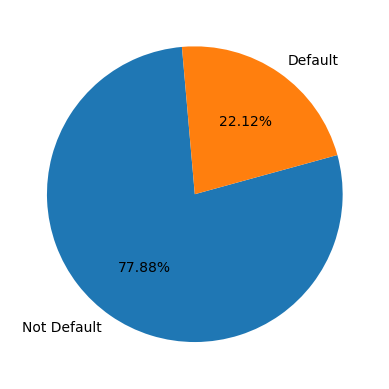

In [30]:
#see moestly pay amount on time
size=[23364,6636]
labels=["Not Default","Default"]

plt.pie(x=size,labels=labels,startangle=95,autopct="%0.2f%%")
plt.show()

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
ohe=OneHotEncoder(drop='first',
    sparse_output=False,dtype=int)

In [33]:
ds=ohe.fit_transform(ls[["Default Status"]])

In [34]:
ds_nds=pd.DataFrame(ds,columns=ohe.get_feature_names_out(["Default Status"]))

In [35]:
ls1=pd.concat([ls,ds_nds],axis=1)

In [36]:
ls1.drop("Default Status",axis=1,inplace=True)

In [37]:
ls1.drop("ID",axis=1,inplace=True)

In [38]:
ls1

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status_Not Default
0,2.0,24,3913.0,312.0,689.0,29137.0,25292.0,-41.0,416.0,689.0,9851.0,1.0,35.0,145.0,0
1,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,48.0,1.0,1.0,1.0,34865.0,2.0,0
2,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,1
3,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,1
4,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,22.0,39,188948.0,192815.0,28365.0,884.0,31237.0,1598.0,85.0,2.0,53.0,347.0,5.0,1.0,1
29996,15.0,43,1683.0,1828.0,352.0,8979.0,519.0,11946.0,1837.0,3526.0,8998.0,129.0,525.0,43.0,1
29997,3.0,37,3565.0,3356.0,2758.0,2878.0,2582.0,19357.0,3965.0,12.0,22.0,42.0,2.0,31.0,0
29998,8.0,41,-1645.0,78379.0,7634.0,52774.0,11855.0,48944.0,859.0,349.0,1178.0,1926.0,52964.0,184.0,0


In [39]:
x=ls1.drop("Default Status_Not Default",axis=1)

In [40]:
y=ls1["Default Status_Not Default"]

In [41]:
y

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: Default Status_Not Default, Length: 30000, dtype: int32

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler()

In [46]:
scaling_train=ss.fit_transform(x_train)

In [47]:
scaling_test=ss.transform(x_test)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score , KFold

In [49]:
k=KFold(n_splits=5)

In [50]:
list=[LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,GaussianNB]

In [51]:

for i in list:
    model=i()
    print(i)
    print(cross_val_score(model,x_train,y_train,cv=k).mean())


<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.7777499999999999
<class 'sklearn.svm._classes.SVC'>
0.7775416666666668
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.6553333333333333
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.7790833333333333
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.7365833333333333
<class 'sklearn.naive_bayes.GaussianNB'>
0.7645833333333333


In [52]:
for i in list:
    model=i()
    print(i)
    print(cross_val_score(model,scaling_train,y_train,cv=k).mean())

<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.7777499999999999
<class 'sklearn.svm._classes.SVC'>
0.7776666666666667
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.6565833333333334
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.779125
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
0.7342083333333334
<class 'sklearn.naive_bayes.GaussianNB'>
0.7640833333333334


In [53]:
from sklearn.naive_bayes import GaussianNB


In [54]:
gb=GaussianNB()

In [55]:
gb.fit(scaling_train,y_train)

GaussianNB()

In [56]:
gb.score(scaling_train,y_train)

0.769375

In [57]:
gb.score(scaling_test,y_test)

0.7758333333333334

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [59]:
dc=DecisionTreeClassifier(max_depth=350, min_samples_split=300, splitter='random')

In [60]:
dc.fit(scaling_train,y_train)

DecisionTreeClassifier(max_depth=350, min_samples_split=300, splitter='random')

In [61]:
dc.score(scaling_train,y_train)

0.7809166666666667

In [62]:
dc.score(scaling_test,y_test)

0.7791666666666667

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
dic={
    "criterion":["gini","entropy"],
    "max_depth":[150,250,350,450,550],
    "splitter":["best","random"],
    "min_samples_split":[50,100,150,200,300]
    
}

In [65]:
gcv=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=dic,cv=k)

In [66]:
gcv.fit(scaling_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [150, 250, 350, 450, 550],
                         'min_samples_split': [50, 100, 150, 200, 300],
                         'splitter': ['best', 'random']})

In [67]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=250, min_samples_split=300, splitter='random')

In [68]:
from sklearn.ensemble import RandomForestClassifier


In [69]:
rc=RandomForestClassifier(max_depth=150, min_samples_split=50, n_estimators=200)

In [70]:
rc.fit(scaling_train,y_train)

RandomForestClassifier(max_depth=150, min_samples_split=50, n_estimators=200)

In [71]:
rc.score(scaling_train,y_train)

0.7840833333333334

In [72]:
rc.score(scaling_test,y_test)

0.7835

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
dic={
    "n_estimators":[100,200,300,400],
    "criterion":["gini","entropy"],
    "max_depth":[150,250,350,450],
    "min_samples_split":[50,100,150,200]
    
}

In [75]:
rscv=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=dic,cv=k)

In [76]:
rscv.fit(scaling_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [150, 250, 350, 450],
                                        'min_samples_split': [50, 100, 150,
                                                              200],
                                        'n_estimators': [100, 200, 300, 400]})

In [77]:
 rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=450, min_samples_split=50)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(scaling_train,y_train)

LogisticRegression()

In [81]:
lr.score(scaling_train,y_train)

0.7777916666666667

In [82]:
lr.score(scaling_test,y_test)

0.783

In [83]:
from sklearn.svm import SVC

In [84]:
s=SVC()

In [85]:
s.fit(scaling_train,y_train)

SVC()

In [86]:
s.score(scaling_train,y_train)

0.77925

In [87]:
s.score(scaling_test,y_test)

0.783